In [1]:
import json
import random
import os
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os
import json
from collections import defaultdict
import random
from PIL import Image
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
from umap.umap_ import UMAP as UMAP
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
sns.set()

/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/umap/d

In [10]:
comb_dict = {
    'Other': 'Other',
    'Other Mustelid': 'Mustelid',
    'Other Mammal': 'Other Mammal',
    'Beaver': 'Rodent',
    'Brambling': 'Bird',
    'Bear': 'Bear',
    'Moose': 'Capreolinae',
    'Blue Tit': 'Bird',
    'Chaffinch': 'Bird',
    'Bullfinch': 'Bird',
    'Mistle Thrush': 'Bird',
    'Squirrel': 'Rodent',
    'Arctic Fox': 'Fox',
    'Great Spotted Woodpecker': 'Bird',
    'White-throated Dipper': 'Bird',
    'Bird': 'Bird',
    'Goldcrest': 'Bird',
    'Lynx': 'Feline',
    'Wren': 'Bird',
    'Shelduck': 'Bird',
    'Badger': 'Mustelid',
    'Greenfinch': 'Bird',
    'Siskin': 'Bird',
    'Green Woodpecker': 'Bird',
    'Spotted Flycatcher': 'Bird',
    'Greylag Goose': 'Bird',
    'Grey Heron': 'Bird',
    'Fieldfare': 'Bird',
    'Yellowhammer': 'Bird',
    'Hare': 'Lepus',
    'Hawk Owl': 'Bird',
    'Sea Eagle': 'Bird',
    'Horse': 'Horse',
    'Deer': 'Deer',
    'Dog': 'Dog',
    'Goshawk': 'Bird',
    'Polecat': 'Mustelid',
    'Wood Grouse': 'Bird',
    'Wolverine': 'Mustelid',
    'Jackdaw': 'Bird',
    'Canada Goose': 'Bird',
    'Cat': 'Feline',
    'Tawny Owl': 'Bird',
    'Hawfinch': 'Bird',
    'Great Tit': 'Bird',
    'Golden Eagle': 'Bird',
    'Crossbill': 'Bird',
    'Crow': 'Bird',
    'Goosander': 'Bird',
    'Great Grey Owl': 'Bird',
    'Siberian Jay': 'Bird',
    'Wagtail': 'Bird',
    'Tit sp.': 'Bird',
    'Mink': 'Mustelid',
    'Blackcap': 'Bird',
    'Buzzard': 'Bird',
    'Marsh Hawk': 'Bird',
    'Song Thrush': 'Bird',
    'Marten': 'Mustelid',
    'Nutcracker': 'Bird',
    'Jay': 'Bird',
    'Black Grouse': 'Bird',
    'Otter': 'Mustelid',
    'Hedgehog': 'Hedgehog',
    'Raven': 'Bird',
    'Reindeer': 'Capreolinae',
    'Fox': 'Fox',
    'Wood Pigeon': 'Bird',
    'Ring Ouzel': 'Bird',
    'Bird of Prey': 'Bird',
    'Woodcock': 'Bird',
    'Redstart': 'Bird',
    'Robin': 'Bird',
    'Redwing': 'Bird',
    'Stoat': 'Mustelid',
    'Roe Deer': 'Roe Deer',
    'Whooper Swan': 'Bird',
    'Sheep': 'Farm Animal',
    'Magpie': 'Bird',
    'Grouse': 'Bird',
    'Small Rodent': 'Rodent',
    'Lemmings': 'Rodent',
    'Nuthatch': 'Bird',
    'Sparrowhawk': 'Bird',
    'Mallard': 'Bird',
    'Cattle': 'Farm Animal',
    'Capercaillie': 'Bird',
    'Starling': 'Bird',
    'Pied Flycatcher': 'Bird',
    'Black Woodpecker': 'Bird',
    'Blackbird': 'Bird',
    'Southern Hare': 'Lepus',
    'Red-backed Shrike': 'Bird',
    'Crane': 'Bird',
    'Thrush sp.': 'Bird',
    'Unknown': 'Unknown',
    'Wolf': 'Wolf',
    'Peregrine Falcon': 'Bird',
    'Wild Boar': 'Boar',
    'Fallow Deer': 'Deer'
}

# comb_dict = {
#     'Other': 'Other',
#     'Other Mustelid': 'Mustelid',
#     'Other Mammal': 'Other Mammal',
#     'Beaver': 'Beaver',
#     'Brambling': 'Bird',
#     'Bear': 'Bear',
#     'Moose': 'Capreolinae',
#     'Blue Tit': 'Bird',
#     'Chaffinch': 'Bird',
#     'Bullfinch': 'Bird',
#     'Mistle Thrush': 'Bird',
#     'Squirrel': 'Squirrel',
#     'Arctic Fox': 'Arctic Fox',
#     'Great Spotted Woodpecker': 'Bird',
#     'White-throated Dipper': 'Bird',
#     'Bird': 'Bird',
#     'Goldcrest': 'Bird',
#     'Lynx': 'Lynx',
#     'Wren': 'Bird',
#     'Shelduck': 'Bird',
#     'Badger': 'Badger',
#     'Greenfinch': 'Bird',
#     'Siskin': 'Bird',
#     'Green Woodpecker': 'Bird',
#     'Spotted Flycatcher': 'Bird',
#     'Greylag Goose': 'Bird',
#     'Grey Heron': 'Bird',
#     'Fieldfare': 'Bird',
#     'Yellowhammer': 'Bird',
#     'Hare': 'Hare',
#     'Hawk Owl': 'Bird',
#     'Sea Eagle': 'Bird',
#     'Horse': 'Horse',
#     'Deer': 'Deer',
#     'Dog': 'Dog',
#     'Goshawk': 'Bird',
#     'Polecat': 'Polecat',
#     'Wood Grouse': 'Bird',
#     'Wolverine': 'Wolverine',
#     'Jackdaw': 'Bird',
#     'Canada Goose': 'Bird',
#     'Cat': 'Cat',
#     'Tawny Owl': 'Bird',
#     'Hawfinch': 'Bird',
#     'Great Tit': 'Bird',
#     'Golden Eagle': 'Bird',
#     'Crossbill': 'Bird',
#     'Crow': 'Bird',
#     'Goosander': 'Bird',
#     'Great Grey Owl': 'Bird',
#     'Siberian Jay': 'Bird',
#     'Wagtail': 'Bird',
#     'Tit sp.': 'Bird',
#     'Mink': 'Mink',
#     'Blackcap': 'Bird',
#     'Buzzard': 'Bird',
#     'Marsh Hawk': 'Bird',
#     'Song Thrush': 'Bird',
#     'Marten': 'Marten',
#     'Nutcracker': 'Bird',
#     'Jay': 'Bird',
#     'Black Grouse': 'Bird',
#     'Otter': 'Otter',
#     'Hedgehog': 'Hedgehog',
#     'Raven': 'Bird',
#     'Reindeer': 'Capreolinae',
#     'Fox': 'Fox',
#     'Wood Pigeon': 'Bird',
#     'Ring Ouzel': 'Bird',
#     'Bird of Prey': 'Bird',
#     'Woodcock': 'Bird',
#     'Redstart': 'Bird',
#     'Robin': 'Bird',
#     'Redwing': 'Bird',
#     'Stoat': 'Stoat',
#     'Roe Deer': 'Roe Deer',
#     'Whooper Swan': 'Bird',
#     'Sheep': 'Sheep',
#     'Magpie': 'Bird',
#     'Grouse': 'Bird',
#     'Small Rodent': 'Rodent',
#     'Lemmings': 'Lemmings',
#     'Nuthatch': 'Bird',
#     'Sparrowhawk': 'Bird',
#     'Mallard': 'Bird',
#     'Cattle': 'Cattle',
#     'Capercaillie': 'Bird',
#     'Starling': 'Bird',
#     'Pied Flycatcher': 'Bird',
#     'Black Woodpecker': 'Bird',
#     'Blackbird': 'Bird',
#     'Southern Hare': 'Southern Hare',
#     'Red-backed Shrike': 'Bird',
#     'Crane': 'Bird',
#     'Thrush sp.': 'Bird',
#     'Unknown': 'Unknown',
#     'Wolf': 'Wolf',
#     'Peregrine Falcon': 'Bird',
#     'Wild Boar': 'Wild Boar',
#     'Fallow Deer': 'Fallow Deer'
# }

comb_dict5 = {
    'Other': 'Other',
    'Other Mustelid': 'Other Mustelid',
    'Other Mammal': 'Other Mammal',
    'Beaver': 'Beaver',
    'Brambling': 'Bird',
    'Bear': 'Bear',
    'Moose': 'Moose',
    'Blue Tit': 'Bird',
    'Chaffinch': 'Bird',
    'Bullfinch': 'Bird',
    'Mistle Thrush': 'Bird',
    'Squirrel': 'Squirrel',
    'Arctic Fox': 'Fox',
    'Great Spotted Woodpecker': 'Bird',
    'White-throated Dipper': 'Bird',
    'Bird': 'Bird',
    'Goldcrest': 'Bird',
    'Lynx': 'Lynx',
    'Wren': 'Bird',
    'Shelduck': 'Bird',
    'Badger': 'Badger',
    'Greenfinch': 'Bird',
    'Siskin': 'Bird',
    'Green Woodpecker': 'Bird',
    'Spotted Flycatcher': 'Bird',
    'Greylag Goose': 'Bird',
    'Grey Heron': 'Bird',
    'Fieldfare': 'Bird',
    'Yellowhammer': 'Bird',
    'Hare': 'Hare',
    'Hawk Owl': 'Bird',
    'Sea Eagle': 'Bird',
    'Horse': 'Horse',
    'Deer': 'Deer',
    'Dog': 'Dog',
    'Goshawk': 'Bird',
    'Polecat': 'Polecat',
    'Wood Grouse': 'Bird',
    'Wolverine': 'Wolverine',
    'Jackdaw': 'Bird',
    'Canada Goose': 'Bird',
    'Cat': 'Lynx',
    'Tawny Owl': 'Bird',
    'Hawfinch': 'Bird',
    'Great Tit': 'Bird',
    'Golden Eagle': 'Bird',
    'Crossbill': 'Bird',
    'Crow': 'Bird',
    'Goosander': 'Bird',
    'Great Grey Owl': 'Bird',
    'Siberian Jay': 'Bird',
    'Wagtail': 'Bird',
    'Tit sp.': 'Bird',
    'Mink': 'Mink',
    'Blackcap': 'Bird',
    'Buzzard': 'Bird',
    'Marsh Hawk': 'Bird',
    'Song Thrush': 'Bird',
    'Marten': 'Marten',
    'Nutcracker': 'Bird',
    'Jay': 'Bird',
    'Black Grouse': 'Bird',
    'Otter': 'Otter',
    'Hedgehog': 'Hedgehog',
    'Raven': 'Bird',
    'Reindeer': 'Reindeer',
    'Fox': 'Fox',
    'Wood Pigeon': 'Bird',
    'Ring Ouzel': 'Bird',
    'Bird of Prey': 'Bird',
    'Woodcock': 'Bird',
    'Redstart': 'Bird',
    'Robin': 'Bird',
    'Redwing': 'Bird',
    'Stoat': 'Stoat',
    'Roe Deer': 'Roe Deer',
    'Whooper Swan': 'Bird',
    'Sheep': 'Sheep',
    'Magpie': 'Bird',
    'Grouse': 'Bird',
    'Small Rodent': 'Small Rodent',
    'Lemmings': 'Lemmings',
    'Nuthatch': 'Bird',
    'Sparrowhawk': 'Bird',
    'Mallard': 'Bird',
    'Cattle': 'Cattle',
    'Capercaillie': 'Bird',
    'Starling': 'Bird',
    'Pied Flycatcher': 'Bird',
    'Black Woodpecker': 'Bird',
    'Blackbird': 'Bird',
    'Southern Hare': 'Southern Hare',
    'Red-backed Shrike': 'Bird',
    'Crane': 'Bird',
    'Thrush sp.': 'Bird',
    'Unknown': 'Unknown',
    'Wolf': 'Wolf',
    'Peregrine Falcon': 'Bird',
    'Wild Boar': 'Boar',
    'Fallow Deer': 'Fallow Deer'
}

comb_dict6 = {
    'Other Mustelid': 'Not Badger',
    'Badger': 'Badger',
    'Polecat': 'Not Badger',
    'Mink': 'Not Badger',
    'Marten': 'Not Badger',
    'Stoat': 'Not Badger',
    'Wolverine': 'Not Badger'
}

comb_dict2 = {
    'Bird': 'Other Species',
    'Wolf': 'Other Species',
    'Rodent': 'Other Species',
    'Bear': 'Other Species',
    'Mustelid': 'Mustelid',
    'Lepus': 'Lepus',
    'Boar': 'Farm Animal',
    'Feline': 'Feline',
    'Fox': 'Fox',
    'Farm Animal': 'Farm Animal',
}

comb_dict3 = {
    'Bird': 'Not Deer',
    'Wolf': 'Not Deer',
    'Rodent': 'Not Deer',
    'Bear': 'Not Deer',
    'Mustelid': 'Not Deer',
    'Lepus': 'Not Deer',
    'Boar': 'Not Deer',
    'Feline': 'Not Deer',
    'Fox': 'Not Deer',
    'Farm Animal': 'Not Deer',
    'Fallow Deer': 'Deer',
    'Moose': 'Capreolinae',
    'Deer': 'Deer',
    'Reindeer': 'Capreolinae',
    'Roe Deer': 'Roe Deer'
}

remove_list = [
    'Bird',
    'Feline',
    'Fox',
    'Farm Animal',
    'Deer',
    'Fallow Deer'
    'Moose',
    'Reindeer'
    'Roe Deer',
    'Bear',
    'Boar',
    'Wolf',
    'Lepus',
    'Rodent'
]

remove_list2 = ['Fox', 'Roe Deer', 'Mustelid', 'Feline', 'Deer', 'Capreolinae', 'Farm Animal', 'Lepus']

In [3]:
def remove_samples(samples, removes):
    new_samples = []
    for sample in samples:
        if(sample['Species'] not in removes):
            new_samples.append(sample)

    return new_samples

def combine_clases(samples, comb_dict):
    new_samples = []
    for sample in samples:
        sample['Species'] = comb_dict[sample['Species']]
        new_samples.append(sample)
    return new_samples

def redo_species_ID(samples):
    labels = []
    for sample in samples:
        if sample['Species'] not in labels:
            labels.append(sample['Species'])
    
    new_samples = []
    for sample in samples:
        sample['Species_ID'] = labels.index(sample['Species'])
        new_samples.append(sample)
    
    return new_samples

In [8]:
with open("/media/user-1/CameraTraps/NINA/Images/aggresive_group_metadata.json") as f:
    metadata = json.load(f)
    categories = metadata['categories']
    annotations = metadata['annotations']

In [9]:
categories

{'Fox': 22168,
 'Roe Deer': 56143,
 'Mustelid': 23332,
 'Bird': 10118,
 'Feline': 5640,
 'Deer': 12262,
 'Capreolinae': 14634,
 'Farm Animal': 5477,
 'Rodent': 6543,
 'Lepus': 12552,
 'Boar': 393,
 'Wolf': 1256,
 'Bear': 115}

In [11]:
# annotations = combine_clases(annotations, comb_dict5)
# annotations = combine_clases(annotations, comb_dict3)
annotations = remove_samples(annotations, remove_list2)
# annotations = combine_clases(annotations, comb_dict6)
annotations = redo_species_ID(annotations)

In [12]:
species = []
for anot in annotations:
    if(anot['Species_ID'] not in species):
        itr = 0
        s = anot['Species']
        for a in annotations:
            if(a['Species'] == anot['Species']):
                itr += 1
        print(anot['Species'], itr)
        species.append(anot['Species_ID'])
print(len(metadata['annotations']), len(annotations))

Bird 10118
Rodent 6543
Boar 393
Wolf 1256
Bear 115
170633 18425


In [13]:
with open("../py/arter.json") as f:
    arter = json.load(f)

In [14]:
for art in arter:
    print(art)

{'ArtID': 46, 'Navn': 'annet'}
{'ArtID': 53, 'Navn': 'Annet mårdyr'}
{'ArtID': 35, 'Navn': 'Annet pattedyr'}
{'ArtID': 40, 'Navn': 'Bever'}
{'ArtID': 1243, 'Navn': 'Bjørkefink'}
{'ArtID': 48, 'Navn': 'Bjørn'}
{'ArtID': 207, 'Navn': 'Blåmeis'}
{'ArtID': 219, 'Navn': 'Bokfink'}
{'ArtID': 204, 'Navn': 'Dompap'}
{'ArtID': 232, 'Navn': 'Duetrost'}
{'ArtID': 55, 'Navn': 'Dåhjort'}
{'ArtID': 10, 'Navn': 'Ekorn'}
{'ArtID': 2, 'Navn': 'Elg'}
{'ArtID': 43, 'Navn': 'Fjellrev'}
{'ArtID': 24, 'Navn': 'Flaggspett'}
{'ArtID': 214, 'Navn': 'Fossekall'}
{'ArtID': 5, 'Navn': 'Fugl'}
{'ArtID': 240, 'Navn': 'Fuglekonge'}
{'ArtID': 1, 'Navn': 'Gaupe'}
{'ArtID': 233, 'Navn': 'Gjerdesmett'}
{'ArtID': 239, 'Navn': 'Gravand'}
{'ArtID': 13, 'Navn': 'Grevling'}
{'ArtID': 208, 'Navn': 'Grønnfink'}
{'ArtID': 209, 'Navn': 'Grønnsisik'}
{'ArtID': 231, 'Navn': 'Grønnspett'}
{'ArtID': 211, 'Navn': 'Gråfluesnapper'}
{'ArtID': 238, 'Navn': 'Grågås'}
{'ArtID': 220, 'Navn': 'Gråhegre'}
{'ArtID': 18, 'Navn': 'Gråtrost'}
{'

In [15]:
new_categories = defaultdict(int)
for anot in annotations:
    new_categories[anot['Species']] += 1

d = {}
for key in new_categories.keys():
    d[key] = new_categories[key]

In [16]:
print(d)

{'Bird': 10118, 'Rodent': 6543, 'Boar': 393, 'Wolf': 1256, 'Bear': 115}


In [17]:
metadata['annotations'] = annotations
metadata['categories'] = d

18348 16356


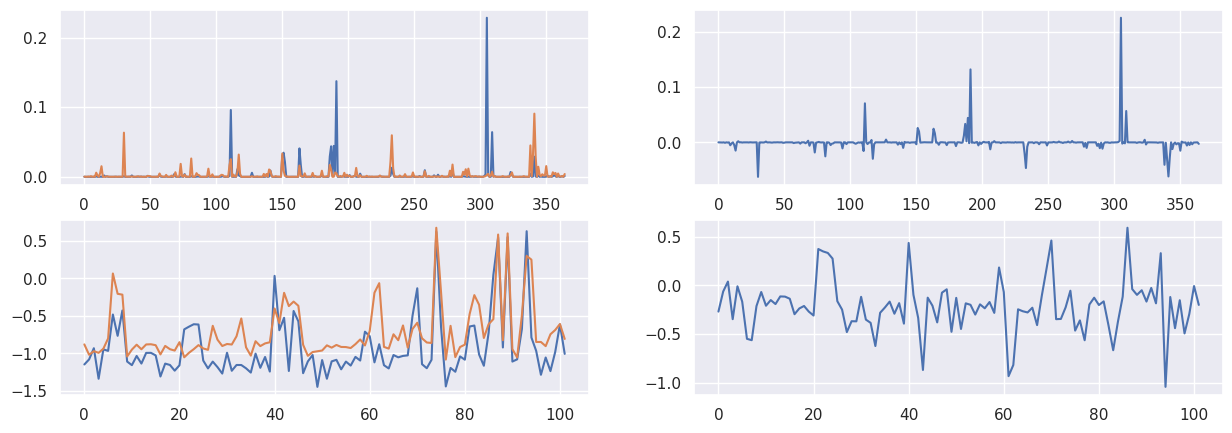

In [18]:
r1 = random.randint(0, len(annotations)-1)
r2 = random.randint(0, len(annotations)-1)
a = np.array(metadata['annotations'][r1]['env_vector'])
b = np.array(metadata['annotations'][r2]['env_vector'])
plt.figure(figsize=(15, 5))
plt.subplot(221)
plt.plot(a[1:366])
plt.plot(b[1:366])
plt.subplot(222)
plt.plot(a[1:366] - b[1:366])
plt.subplot(223)
plt.plot(a[366:])
plt.plot(b[366:])
plt.subplot(224)
plt.plot(a[366:]-b[366:])
print(r1, r2)

In [19]:
def save(metadata, fn):
    with open(fn, "w") as f:
        json.dump(metadata, f)
    print(os.path.isfile(fn))

file = "/media/user-1/CameraTraps/NINA/Images/other_5_metadata.json"
save(metadata, file)

True


In [264]:
def check_num(s):
    try:
        float(s)
        return True
    except:
        return False

def gen_data(annotations):
    data = []
    labels = []
    label_IDs = []
    d = defaultdict(int)
    for anot in annotations:
        if(d[anot['Species_ID']] < 100):
            d[anot['Species_ID']] += 1
            temp = []
            temp.extend(anot['datetime_vector'])
            temp.extend(anot['env_vector'])
            temp.append(anot['Latitude'])
            temp.append(anot['Longitude'])
            t = anot['Temperature']
            if(t is None):
                t = [0, 0]
            else:
                if(check_num(t)):
                    t = [1, t]
                else:
                    t = t.strip()
                    t = t.replace(" C", "")
                    t = float(t)
                    t = [1, t]
            temp.extend(t)
            data.append(temp)
            labels.append(anot['Species'])
            label_IDs.append(anot['Species_ID'])

    return data, labels, label_IDs


In [265]:
data, labels, label_IDs = gen_data(annotations) 
data = np.array(data).astype(float)
labels = np.array(labels)
label_IDs = np.array(label_IDs).astype(int)

In [266]:
reducer = UMAP(random_state=42)
reducer.fit(data)
embedding = reducer.transform(data)

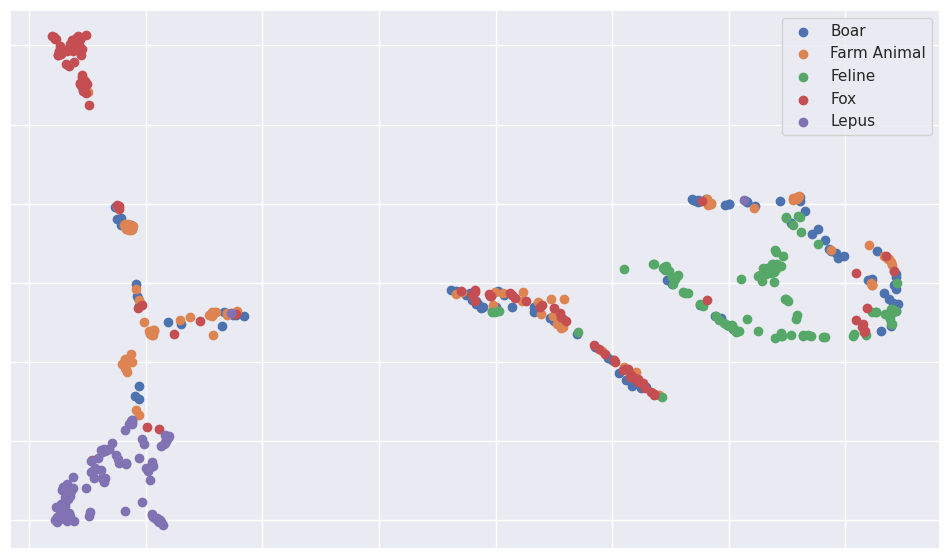

In [268]:
plt.figure(figsize=(12, 7))
plt.gca().axes.get_xaxis().set_ticklabels([], alpha=0)
plt.gca().axes.get_yaxis().set_ticklabels([], alpha=0)
for u in np.unique(label_IDs):
    targets = (label_IDs == u)
    sub_embed = embedding[targets]
    plt.scatter(sub_embed[:, 0], sub_embed[:, 1])
plt.legend(np.unique(labels))
plt.savefig("../../Report_v2/images/Chapter3/UMAP_not_deer_9.png", dpi=300)

In [21]:
a = 'mustelids'
b = 'Lepus'
c = 'Fox'
d = 'Feline'
e = 'Farm Animal'
f = 'Boar'
g = 'rest'
['Bear', 'Bird', 'Wolf', 'Rodent']